In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
raw_df = pd.read_csv('../raw_data/vestiaire.csv')
display(raw_df[0:2].T)

,0,1
product_id,43247626,43247441
product_type,Wool mini skirt,Jacket
product_name,Wool mini skirt Miu Miu Grey size S Internatio...,Jacket Barbara Bui Navy size 42 FR in Cotton
product_description,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,For selling nice women's suit Barbara Bui size...
product_keywords,Miu Miu Wool Skirts,Barbara Bui Cotton Jackets
product_gender_target,Women,Women
product_category,Women Clothing,Women Clothing
product_season,Autumn / Winter,All seasons
product_condition,Never worn,Very good condition
product_like_count,34.0,1.0


In [4]:
raw_df.shape

(900514, 36)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [7]:
raw_df.describe()

,product_id,product_like_count,brand_id,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,9.005140e+05,900514.000000,900514.000000,900514.000000,900514.000000,900514.000000,886778.000000,9.005140e+05,900514.000000,900514.000000,9.005140e+05,9.005140e+05,900514.000000
mean,3.810003e+07,6.298326,2437.277576,386.862536,331.639409,290.436463,55.486152,1.382227e+07,664.958267,1497.663143,5.623160e+04,9.904618e+03,72.461753
std,7.749403e+06,12.920079,3702.869580,1859.559156,1591.472807,1498.157606,290.259974,7.535593e+06,3552.744596,5460.166852,1.438156e+05,3.557486e+05,34.428663
min,1.113630e+05,0.000000,2.000000,6.130000,5.110000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-180.000000
25%,3.811580e+07,1.000000,66.000000,83.070000,71.360000,58.580000,11.720000,7.977389e+06,6.000000,10.000000,0.000000e+00,1.700000e+01,68.000000
50%,4.174207e+07,3.000000,341.000000,168.700000,143.780000,125.370000,23.970000,1.438324e+07,34.000000,52.000000,0.000000e+00,7.300000e+01,88.000000
75%,4.267775e+07,7.000000,3266.000000,350.000000,298.200000,261.900000,50.480000,1.946235e+07,178.000000,373.000000,2.539300e+04,2.900000e+02,95.000000
max,4.324884e+07,3154.000000,18237.000000,632610.000000,527175.000000,509229.750000,105435.000000,2.608177e+07,79738.000000,39628.000000,1.064736e+06,1.417912e+07,100.000000


In [57]:
df1 = raw_df.copy()

In [58]:
df1.drop_duplicates()
df1.shape

(900514, 36)

In [12]:
df1.isna().mean() * 100

product_id                     0.000000
product_type                   0.000000
product_name                   0.000000
product_description            0.000777
product_keywords               0.131369
product_gender_target          0.000000
product_category               0.131369
product_season                 0.000222
product_condition              0.000000
product_like_count             0.000000
sold                           0.000000
reserved                       0.000000
available                      0.000000
in_stock                       0.000000
should_be_gone                 0.000000
brand_id                       0.000000
brand_name                     0.000000
brand_url                      0.000000
product_material               0.000444
product_color                  0.000111
price_usd                      0.000000
seller_price                   0.000000
seller_earning                 0.000000
seller_badge                   0.000000
has_cross_border_fees          1.525351


In [19]:
df1['usually_ships_within'].value_counts()

usually_ships_within
1-2 days            546943
3-5 days            180755
6-7 days             16816
More than 7 days      1209
Name: count, dtype: int64

In [27]:
df1['usually_ships_within'] = df1['usually_ships_within'].replace({"NaN": np.nan})

In [31]:
df1['usually_ships_within'].value_counts(dropna=False)

usually_ships_within
1-2 days            546943
3-5 days            180755
NaN                 154791
6-7 days             16816
More than 7 days      1209
Name: count, dtype: int64

In [59]:
# handling missing data 'usually ships within'

# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")

# Call the "fit" method on the object
df1['usually_ships_within'] = imputer.fit_transform(df1[['usually_ships_within']]).reshape(-1)

In [23]:
!git add notebook_SA.ipynb

In [24]:
!git commit -m 'Test push of First Notebook'

[eda dcc7da1] Test push of First Notebook
 1 file changed, 1213 insertions(+)
 create mode 100644 notebooks/notebook_SA.ipynb


In [25]:
!git push origin eda

Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 7.70 KiB | 2.57 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:aplabey/2nd_hand_fashion_valuation.git
   5765231..dcc7da1  eda -> eda


In [45]:
df1['usually_ships_within'].value_counts()

usually_ships_within
1-2 days            701734
3-5 days            180755
6-7 days             16816
More than 7 days      1209
Name: count, dtype: int64

In [46]:
df1['product_category'].value_counts(dropna=False)

product_category
Men Clothing         193082
Women Clothing       192197
Women Accessories    146018
Women Shoes          143833
Men Shoes            125425
Men Accessories       98776
NaN                    1183
Name: count, dtype: int64

In [60]:
df1['product_category'] = imputer.fit_transform(df1[['product_category']]).reshape(-1)

In [48]:
df1['product_category'].value_counts(dropna=False)

product_category
Men Clothing         194265
Women Clothing       192197
Women Accessories    146018
Women Shoes          143833
Men Shoes            125425
Men Accessories       98776
Name: count, dtype: int64

In [49]:
df1['product_keywords'].value_counts(dropna=False)

product_keywords
Gucci Plastic Sunglasses                                   4078
Hermès Silk Scarves                                        2513
Hermès Silk Ties                                           2441
Burberry Cotton Coats                                      2347
Prada Plastic Sunglasses                                   2184
                                                           ... 
Walter Van Beirendonck Synthetic Knitwear & Sweatshirts       1
LVIR Vegan leather Trousers                                   1
Brunello Cucinelli Fur Trainers                               1
Rick Owens Cloth Flats                                        1
FRANCO SARTO Velvet Heels                                     1
Name: count, Length: 124615, dtype: int64

In [61]:
df1['product_keywords'] = imputer.fit_transform(df1[['product_keywords']]).reshape(-1)

In [51]:
df1['product_keywords'].value_counts(dropna=False)

product_keywords
Gucci Plastic Sunglasses                   5261
Hermès Silk Scarves                        2513
Hermès Silk Ties                           2441
Burberry Cotton Coats                      2347
Prada Plastic Sunglasses                   2184
                                           ... 
Barbed Cotton Jackets                         1
Rodrigo Otazu Polyester Jackets               1
MSFTSrep Cotton Shirts                        1
Ralph Lauren Linen Suits                      1
Doppiaa Cashmere Knitwear & Sweatshirts       1
Name: count, Length: 124614, dtype: int64

In [62]:
df1['has_cross_border_fees'].value_counts(dropna=False)

has_cross_border_fees
True    886778
NaN      13736
Name: count, dtype: int64

In [63]:
imputer = SimpleImputer(strategy='constant', fill_value='False')

df1['has_cross_border_fees'] = imputer.fit_transform(df1[['has_cross_border_fees']]).reshape(-1)

In [64]:
df1['has_cross_border_fees'].value_counts(dropna=False)

has_cross_border_fees
True     886778
False     13736
Name: count, dtype: int64

In [65]:
df1['buyers_fees'].value_counts(dropna=False)

buyers_fees
0.00      33571
NaN       13736
31.95     12615
10.65     10575
21.30     10556
          ...  
449.22        1
235.79        1
95.45         1
200.53        1
426.43        1
Name: count, Length: 15777, dtype: int64

In [66]:
imputer = SimpleImputer(strategy='median')

df1['buyers_fees'] = imputer.fit_transform(df1[['buyers_fees']]).reshape(-1)

In [67]:
df1['buyers_fees'].value_counts(dropna=False)

buyers_fees
0.00      33571
23.97     13751
31.95     12615
10.65     10575
21.30     10556
          ...  
215.20        1
200.26        1
95.45         1
56.82         1
86.66         1
Name: count, Length: 15776, dtype: int64

In [70]:
round((df1.isna().mean() * 100).sum(),4)

np.float64(0.0059)

In [71]:
df1.dropna(inplace=True)

In [72]:
df1.isna().mean()

product_id                    0.0
product_type                  0.0
product_name                  0.0
product_description           0.0
product_keywords              0.0
product_gender_target         0.0
product_category              0.0
product_season                0.0
product_condition             0.0
product_like_count            0.0
sold                          0.0
reserved                      0.0
available                     0.0
in_stock                      0.0
should_be_gone                0.0
brand_id                      0.0
brand_name                    0.0
brand_url                     0.0
product_material              0.0
product_color                 0.0
price_usd                     0.0
seller_price                  0.0
seller_earning                0.0
seller_badge                  0.0
has_cross_border_fees         0.0
buyers_fees                   0.0
warehouse_name                0.0
seller_id                     0.0
seller_username               0.0
usually_ships_

In [73]:
df1.shape

(900461, 36)

In [74]:
df1.duplicated().sum()

np.int64(0)

<Axes: xlabel='price_usd', ylabel='Count'>

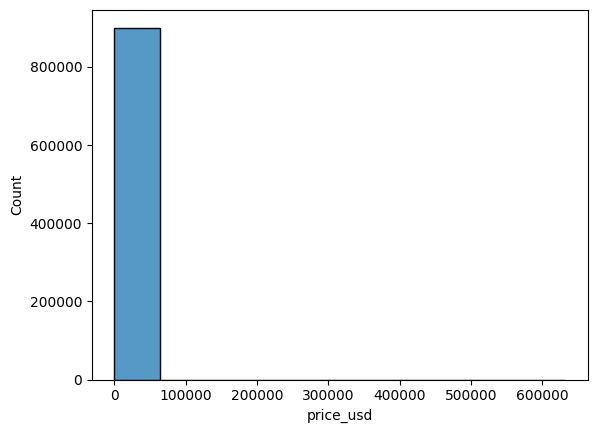

In [83]:
sns.histplot(df1['price_usd'],bins=10)

In [81]:
df1.describe()

,product_id,product_like_count,brand_id,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,9.004610e+05,900461.000000,900461.000000,900461.000000,900461.000000,900461.000000,900461.000000,9.004610e+05,900461.000000,900461.000000,9.004610e+05,9.004610e+05,900461.000000
mean,3.810043e+07,6.298397,2437.184510,386.879346,331.653883,290.449599,55.007742,1.382225e+07,664.992804,1497.739960,5.623266e+04,9.905196e+03,72.461435
std,7.749080e+06,12.920318,3702.824079,1859.612350,1591.518331,1498.200555,288.071894,7.535730e+06,3552.846013,5460.317754,1.438164e+05,3.557591e+05,34.429517
min,1.113630e+05,0.000000,2.000000,6.130000,5.110000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-180.000000
25%,3.811660e+07,1.000000,66.000000,83.070000,71.360000,58.580000,11.750000,7.977389e+06,6.000000,10.000000,0.000000e+00,1.700000e+01,68.000000
50%,4.174221e+07,3.000000,341.000000,168.700000,143.780000,125.460000,23.970000,1.438217e+07,34.000000,52.000000,0.000000e+00,7.300000e+01,88.000000
75%,4.267777e+07,7.000000,3266.000000,350.000000,298.200000,261.900000,49.880000,1.946313e+07,178.000000,373.000000,2.540400e+04,2.900000e+02,95.000000
max,4.324884e+07,3154.000000,18237.000000,632610.000000,527175.000000,509229.750000,105435.000000,2.608177e+07,79738.000000,39628.000000,1.064736e+06,1.417912e+07,100.000000


In [85]:
numerical_colns = df1.select_dtypes(include=np.number)
numerical_colns = numerical_colns[['product_like_count','price_usd', 'seller_price', 'seller_earning', 'buyers_fees', 'seller_products_sold', 'seller_num_products_listed', 'seller_community_rank', 'seller_num_followers', 'seller_pass_rate']]
numerical_colns

,product_like_count,price_usd,seller_price,seller_earning,buyers_fees,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,34.0,272.92,223.65,216.94,23.97,3.0,14.0,0.0,13.0,0.0
1,1.0,127.80,106.50,106.50,21.30,0.0,0.0,0.0,8.0,0.0
2,2.0,1278.00,1065.00,926.55,213.00,58.0,69.0,0.0,62.0,96.0
3,0.0,163.90,149.00,126.65,14.90,63.0,274.0,126346.0,131.0,96.0
4,1.0,119.72,99.77,83.55,19.95,19.0,14.0,102821.0,40.0,89.0
...,...,...,...,...,...,...,...,...,...,...
900509,1.0,89.46,74.55,60.71,14.91,40.0,17.0,391778.0,104.0,100.0
900510,1.0,153.36,127.80,108.63,25.56,26.0,99.0,51408.0,75.0,89.0
900511,0.0,191.70,159.75,138.98,31.95,0.0,2.0,0.0,3.0,0.0
900512,27.0,57.51,47.93,34.08,9.59,2.0,7.0,0.0,11.0,100.0


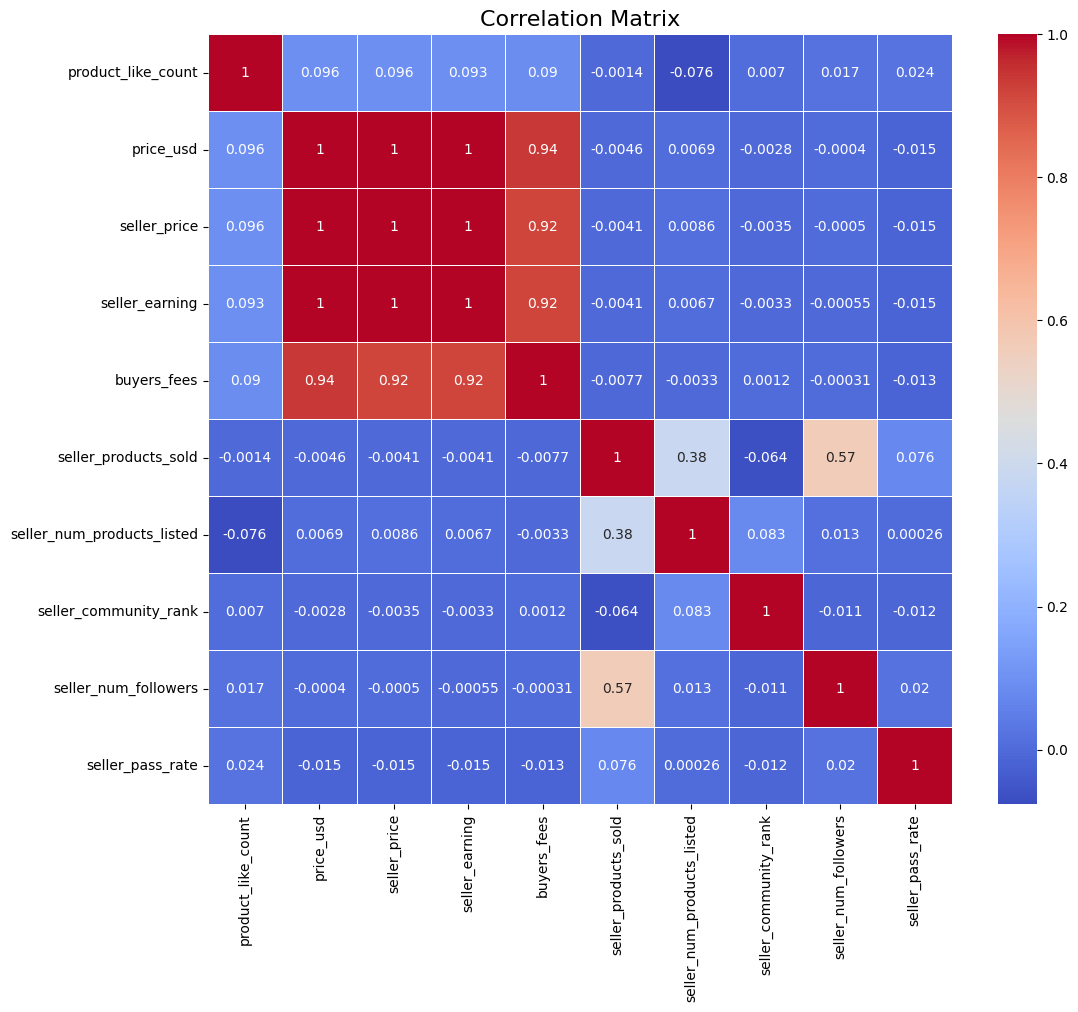

In [88]:
correlation_matrix = numerical_colns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Data Preparations Starts Here

In [124]:
# copying the raw df
df2 = raw_df.copy()
df2[0:2]

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0


In [125]:
# dropping 3 x numerical colns and 7 x cat colns
df2 = df2.drop(columns=['product_id','brand_id','seller_id','product_name','product_description','product_keywords','brand_url',
                       'seller_badge','warehouse_name','seller_username'], axis=1)
df2[0:2]

,product_type,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,reserved,available,in_stock,...,seller_earning,has_cross_border_fees,buyers_fees,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,Wool mini skirt,Women,Women Clothing,Autumn / Winter,Never worn,34.0,True,False,True,False,...,216.94,NaN,NaN,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,Jacket,Women,Women Clothing,All seasons,Very good condition,1.0,False,False,True,False,...,106.50,True,21.3,NaN,Belgium,0.0,0.0,0.0,8.0,0.0


In [126]:
# filling NaN values for some of the colns
imputer = SimpleImputer(strategy="most_frequent")

# Call the "fit" method on the object
df2['usually_ships_within'] = imputer.fit_transform(df2[['usually_ships_within']]).reshape(-1)

In [127]:
df2['product_category'] = imputer.fit_transform(df2[['product_category']]).reshape(-1)

In [128]:
imputer = SimpleImputer(strategy='constant', fill_value='False')

df2['has_cross_border_fees'] = imputer.fit_transform(df2[['has_cross_border_fees']]).reshape(-1)

In [129]:
imputer = SimpleImputer(strategy='median')

df2['buyers_fees'] = imputer.fit_transform(df2[['buyers_fees']]).reshape(-1)

In [130]:
df2['usually_ships_within'].value_counts(dropna=False)

usually_ships_within
1-2 days            701734
3-5 days            180755
6-7 days             16816
More than 7 days      1209
Name: count, dtype: int64

In [131]:
# dropping rest of the values
df2.dropna(inplace=True)

In [132]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900507 entries, 0 to 900513
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_type                900507 non-null  object 
 1   product_gender_target       900507 non-null  object 
 2   product_category            900507 non-null  object 
 3   product_season              900507 non-null  object 
 4   product_condition           900507 non-null  object 
 5   product_like_count          900507 non-null  float64
 6   sold                        900507 non-null  bool   
 7   reserved                    900507 non-null  bool   
 8   available                   900507 non-null  bool   
 9   in_stock                    900507 non-null  bool   
 10  should_be_gone              900507 non-null  bool   
 11  brand_name                  900507 non-null  object 
 12  product_material            900507 non-null  object 
 13  product_color      

In [133]:
df2[0:2].T

,0,1
product_type,Wool mini skirt,Jacket
product_gender_target,Women,Women
product_category,Women Clothing,Women Clothing
product_season,Autumn / Winter,All seasons
product_condition,Never worn,Very good condition
product_like_count,34.0,1.0
sold,True,False
reserved,False,False
available,True,True
in_stock,False,False


In [219]:
# copying features
X_preprocess = df2.drop(columns=['price_usd'])
X_preprocess.shape

(900507, 25)

In [184]:
# copying target
y_preprocess = df2[['price_usd']]
y_preprocess.shape

(900507, 1)

In [145]:
# checking for number of unique cat values for each cat feature
df2[df2.select_dtypes(exclude='number').columns].nunique().reset_index(name='cardinality')

,index,cardinality
0,product_type,10984
1,product_gender_target,2
2,product_category,6
3,product_season,3
4,product_condition,5
5,sold,2
6,reserved,1
7,available,2
8,in_stock,2
9,should_be_gone,2


In [185]:
cat_features = X_preprocess.select_dtypes(include=['object','bool']).columns
num_features = X_preprocess.select_dtypes(include='number').columns

In [186]:
num_features

Index(['product_like_count', 'seller_price', 'seller_earning', 'buyers_fees',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')

In [187]:
cat_features

Index(['product_type', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'sold', 'reserved', 'available',
       'in_stock', 'should_be_gone', 'brand_name', 'product_material',
       'product_color', 'has_cross_border_fees', 'usually_ships_within',
       'seller_country'],
      dtype='object')

In [190]:
def num_encoder(df):
    for col in num_features:
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])
    return df

In [221]:
X_preprocess = num_encoder(X_preprocess)

In [222]:
X_preprocess[0:3].T

,0,1,2
product_type,Wool mini skirt,Jacket,Wool coat
product_gender_target,Women,Women,Women
product_category,Women Clothing,Women Clothing,Women Clothing
product_season,Autumn / Winter,All seasons,Autumn / Winter
product_condition,Never worn,Very good condition,Very good condition
product_like_count,2.144076,-0.410082,-0.332683
sold,True,False,False
reserved,False,False,False
available,True,True,True
in_stock,False,False,False


In [201]:
# this cat function didn't work out as intended
def cat_encoder(df):
    for col in cat_features:
        if df[col].dtype == 'object': 
            encoder = LabelEncoder()
            df[col] = encoder.fit_transform(df[col].values)
    return df

In [207]:
X_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900507 entries, 0 to 900513
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_type                900507 non-null  object 
 1   product_gender_target       900507 non-null  object 
 2   product_category            900507 non-null  object 
 3   product_season              900507 non-null  object 
 4   product_condition           900507 non-null  object 
 5   product_like_count          900507 non-null  float64
 6   sold                        900507 non-null  bool   
 7   reserved                    900507 non-null  bool   
 8   available                   900507 non-null  bool   
 9   in_stock                    900507 non-null  bool   
 10  should_be_gone              900507 non-null  bool   
 11  brand_name                  900507 non-null  object 
 12  product_material            900507 non-null  object 
 13  product_color      

In [223]:
# used an alternative cat function for decoding both object anbd bool colns ... this worked out
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object' or df[c].dtype=='bool': 
            #df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [224]:
# final X with all processed features
X_processed=labelencoder(X_preprocess)

In [228]:
X_processed.shape

(900507, 25)

In [249]:
X_processed[0:3].T

,0,1,2
product_type,10778.000000,4823.000000,10752.000000
product_gender_target,1.000000,1.000000,1.000000
product_category,4.000000,4.000000,4.000000
product_season,1.000000,0.000000,1.000000
product_condition,2.000000,4.000000,4.000000
product_like_count,2.144076,-0.410082,-0.332683
sold,1.000000,0.000000,0.000000
reserved,0.000000,0.000000,0.000000
available,1.000000,1.000000,1.000000
in_stock,0.000000,0.000000,0.000000


# Modelling Starts here

In [231]:
# random sampling 20k data from X_processed
n=len(X_processed)
N=list(range(n))
random.shuffle(N)
X_sample=X_processed.iloc[N[0:20000]]

In [233]:
X_sample.shape

(20000, 25)

In [234]:
# similarly for target
y_sample = y_preprocess.iloc[N[0:20000]]
y_sample.shape

(20000, 1)

In [235]:
# splitting X_sample and y_sample into test and train
X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000, 25), (6000, 25), (14000, 1), (6000, 1))

In [250]:
# using cross validation to train the baseline model
base_model = LinearRegression()

base_result = cross_val_score(base_model, X_train, y_train, cv=5, n_jobs=-1, scoring='r2').mean()

In [251]:
base_result

np.float64(0.9999762254030864)

In [255]:
# fitting the model
base_model.fit(X_train,y_train)

LinearRegression()

In [256]:
# predicting y_pred
y_pred = base_model.predict(X_test)
y_pred

array([[ 62.55395844],
       [229.21663286],
       [191.64365342],
       ...,
       [ 54.84224928],
       [ 52.23672681],
       [713.81469221]])

In [257]:
y_test - y_pred

,price_usd
188474,0.066042
255497,0.263367
12896,0.056347
849513,-0.463416
179588,-0.026845
...,...
293059,0.088743
642172,-0.219413
221534,0.107751
870802,0.143273


In [258]:
!git add notebook_SA.ipynb

In [247]:
!git commit -m 'Carried out baseline model updated'

[eda d15bccc] Carried out baseline model
 1 file changed, 3517 insertions(+), 157 deletions(-)


In [248]:
!git push origin eda

Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 144.82 KiB | 893.00 KiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:aplabey/2nd_hand_fashion_valuation.git
   dcc7da1..d15bccc  eda -> eda
